In [28]:
# Import Libraries
import os 
import argparse
from PIL import Image
import cv2
from plantcv import plantcv as pcv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from collections import OrderedDict  #from colorspacious import cspace_converter
cmaps = OrderedDict()

In [29]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

In [30]:
class options:
    def __init__(self):
        self.image = "/Users/garethtate/plantcv/final/raw_images/VIS_SV_2021-07-09_12-19-24.jpg"
        self.debug = "plot"
        self.writeimg= False 
        self.result = "general_draft1_results.json"
        self.outdir = "/Users/garethtate/plantcv/final/output_files/" # Store the output to the current directory
        self.vispdfs = "/Users/garethtate/plantcv/final/pdf_data/VIS_general_draft1_pdfs.txt"
        self.nirpdfs = "/Users/garethtate/plantcv/final/pdf_data/NIR_general_draft1_pdfs.txt"

# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug

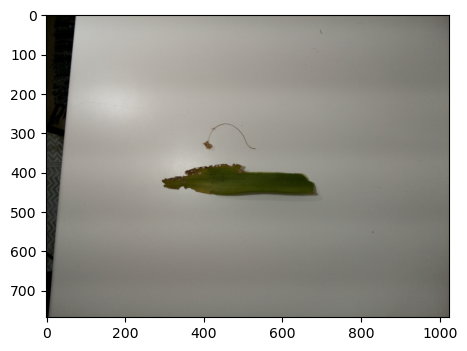

In [31]:
# Read image 

# Inputs:
#   filename - Image file to be read in 
#   mode - Return mode of image; either 'native' (default), 'rgb', 'gray', or 'csv' 
VIS_img, VIS_path, VIS_filename = pcv.readimage(filename=args.image)

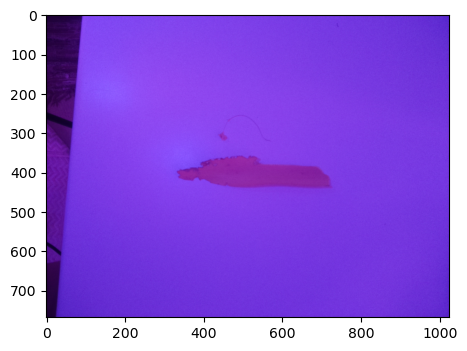

In [32]:
nirpath = pcv.get_nir(VIS_path,VIS_filename)
NIR_img, NIR_path, NIR_filename = pcv.readimage(nirpath)

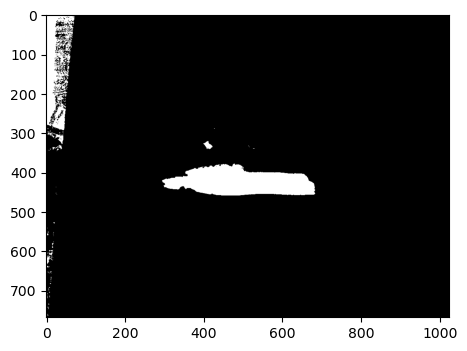

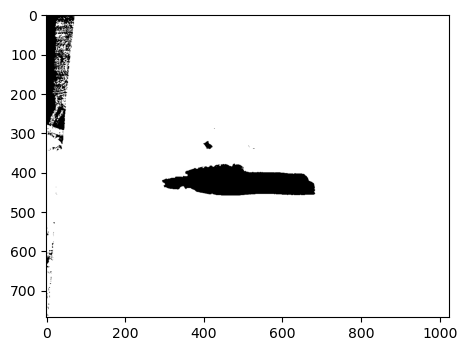

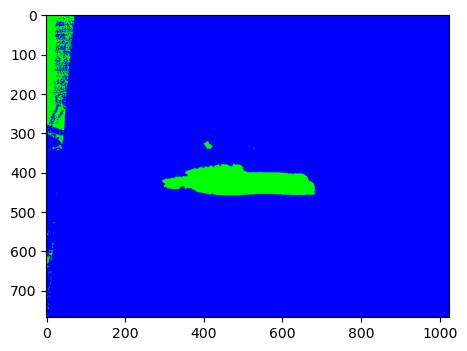

In [33]:
# Classify each pixel as plant or background (background and system components)
VIS_masks = pcv.naive_bayes_classifier(rgb_img=VIS_img, pdf_file=args.vispdfs)
VIS_colored_img = pcv.visualize.colorize_masks(masks=[VIS_masks['plant'], VIS_masks['background']], 
                                               colors=['green', 'blue'])

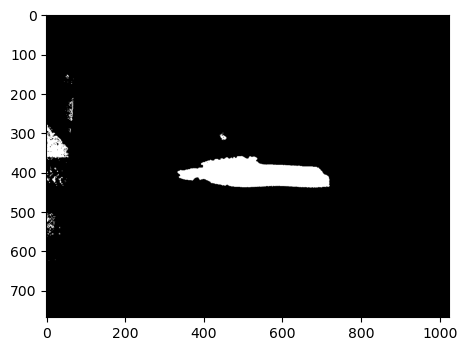

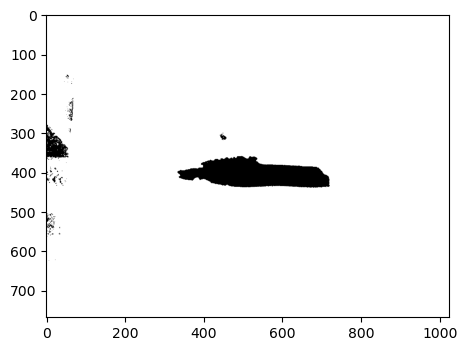

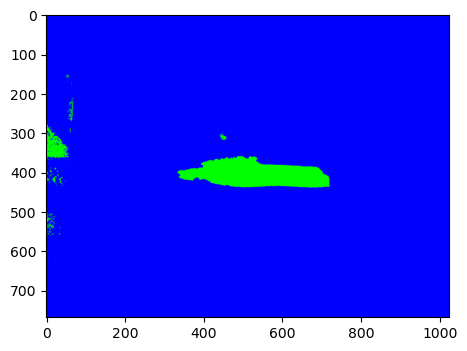

In [34]:
# Classify each pixel as plant or background (background and system components)
NIR_masks = pcv.naive_bayes_classifier(rgb_img=NIR_img, pdf_file=args.nirpdfs)
NIR_colored_img = pcv.visualize.colorize_masks(masks=[NIR_masks['plant'], NIR_masks['background']], 
                                               colors=['green', 'blue'])

In [35]:
# # Print out the colorized figure that got created 
# pcv.print_image(colored_img, os.path.join(args.outdir, filename))